In [ ]:
import re
import pandas as pd
import csv
import numpy as np
from collections import Counter
import nltk
import random
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/thesis/train/token.csv', sep=',')

df2 = pd.read_csv('/content/drive/MyDrive/thesis/val/val-token.csv', sep=',')

In [ ]:
df2.shape

(102000, 1)

In [ ]:
df1.shape

(1021009, 1)

In [ ]:
df1.head(5)

,0
0,info nova metadata wsgi server get status 200
1,info nova metadata wsgi server get status 200
2,info nova metadata wsgi server get status 200
3,info nova metadata wsgi server get status 200
4,info nova osapi_compute wsgi server get status...


In [ ]:
column_name = ['content']

In [ ]:
df1.columns = column_name

In [ ]:
df1.head(5)

,content
0,info nova metadata wsgi server get status 200
1,info nova metadata wsgi server get status 200
2,info nova metadata wsgi server get status 200
3,info nova metadata wsgi server get status 200
4,info nova osapi_compute wsgi server get status...


In [ ]:
df2.columns = column_name

In [ ]:
df2.shape

(102000, 1)

In [ ]:
df2.head()

,content
0,info nova metadata wsgi server get status 200
1,info nova metadata wsgi server get status 200
2,info nova metadata wsgi server get status 200
3,info nova metadata wsgi server get status 200
4,info nova osapi_compute wsgi server get status...


In [ ]:
cv_out = df2['content'].tolist()

In [ ]:
new = df1['content'].tolist()

In [ ]:
count_vectorizer = CountVectorizer(max_features = 1000)

In [ ]:
bag_of_words = count_vectorizer.fit_transform(new)


In [ ]:
type(bag_of_words)

scipy.sparse._csr.csr_matrix

In [ ]:
get_feature = count_vectorizer.transform(cv_out)
feature_names = count_vectorizer.get_feature_names_out()

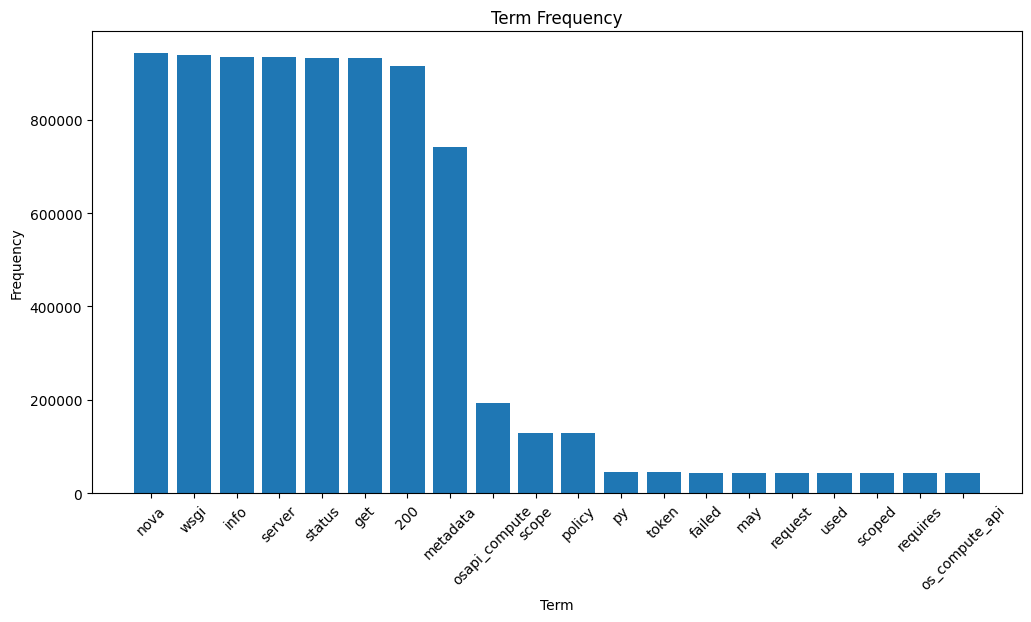

In [ ]:
import matplotlib.pyplot as plt

term_frequency = bag_of_words.sum(axis=0).A1

# Create a DataFrame to store the term frequency values
df_term_frequency = pd.DataFrame({'Term': count_vectorizer.get_feature_names_out(), 'Frequency': term_frequency})

# Sort the DataFrame by frequency in descending order
df_term_frequency = df_term_frequency.sort_values(by='Frequency', ascending=False)

# Plot the term frequency
plt.figure(figsize=(12, 6))
plt.bar(df_term_frequency['Term'][:20], df_term_frequency['Frequency'][:20])
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('Term Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
feature_out = pd.DataFrame(get_feature.toarray(), columns=feature_names)

In [ ]:
bag_of_words_df.shape

(1021009, 518)

In [ ]:
bag_of_words_df.head(5)

,100,109,110,111,114,115,124,137,143,146,...,vthm,warn,warning,warnings,white,with_traceback,wrapped,wrapper,wsgi,ybk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
feature_out.head(5)

,100,109,110,111,114,115,124,137,143,146,...,vthm,warn,warning,warnings,white,with_traceback,wrapped,wrapper,wsgi,ybk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = bag_of_words_df.to_numpy()

In [ ]:

x_out = feature_out.to_numpy()

In [ ]:
# Check if row values are more than 1
for row in X:
    if any(count > 1 for count in row):
        print("Row values are more than 1.")
        break
else:
    print("Row values are not more than 1.")

Row values are more than 1.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_scaled = mm_scaler.fit_transform(bag_of_words_df)
x_out = mm_scaler.transform(feature_out)

In [ ]:
x = pd.DataFrame(X_scaled)

In [ ]:
x.head(5)

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0


In [ ]:
x.shape

(1021009, 518)

In [ ]:
x.to_csv('/content/drive/MyDrive/thesis/train/cv_scaled.csv', index=False)

In [ ]:
cv = pd.DataFrame(x_out)

In [ ]:
cv.shape

(102000, 518)

In [ ]:
cv.to_csv('/content/drive/MyDrive/thesis/val/val-cv_out.csv', index=False)

In [ ]:
cv.head(5)

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
